### 任务描述

掌握梯度下降的基本概念，目的以及方法，能够利用梯度下降算法求解最小值。

**基本概念**

梯度下降法目的是为了“下降”，下降的方法是按照“梯度”。

比如你在一座山上，当前你只能迈出一步，如何走才能使你的高度下降的最多呢，根据梯度的理论，我们沿着当前梯度的反方向走，会让我们的下降幅度最大。

上述例子中，山就是一个函数，在山上的你就是函数中待优化的变量，人的坐标表示变量初始值，我们要 求的是函数最小值即到达山底，人该如何走即如何迭代变量。所以我们只要沿着函数梯度的反方向，就能最快的到达我们要去的地方。

梯度下降是一种更新参数的方法，具体如何更新跟原函数的在某点的梯度有关。不会改变要求的最优解。

我们可以利用梯度下降法求最大值和最小值，求最大值沿着梯度方向走即可，求最小值则沿着梯度的反方向走。

**公式**

**抽象的公式为：**

$\theta^{next}=\theta^{now}-\alpha\nabla f(\theta^{now})$

$\theta^{next}$:x在下个时刻的坐标

$\theta^{now}$：x在当前时刻的坐标

$\alpha$：步长，每一步走多远，即学习率

$\nabla f(\theta^{now})$：目标函数$f(x)$在$\theta^{now}$点的导数

**举例**

目标函数$y=x^2$，学习率$\alpha=0.1$，当前位置$x=1$，要求y最小值，则下一时刻x的值应该更新为多少呢。

$x=1-0.1*2.1=0.8$，此时的$x$比$x=1$的时候更接近0这个最小值。这就是一元变量下的梯度下降算法，多元变量也是一样的，只是求梯度时有些许不同而已。

**梯度下降算法求解最小值**

**（1）$\theta$更新过程：**

![jupyter](https://i.loli.net/2021/05/22/VldTkbpvLJxz8ur.png)

$\theta$更新过程可以写成：

![jupyter](https://i.loli.net/2021/05/22/zecQfyXhnTbkFO6.png)

**（2）向量化**

约定训练数据的矩阵形式如下，x的每一行为一条训练样本，而每一列为不同的特称取值：

![jupyter](https://i.loli.net/2021/05/22/GAEFgtiyDprfvUO.png)

![jupyter](https://i.loli.net/2021/05/22/HI6SKYkiWoCEL72.png)

![jupyter](https://i.loli.net/2021/05/22/D8wISCxm3bsV2jJ.png)

$g(A)$的参数A为一列向量，所以实现g函数时要支持列向量作为参数，并返回列向量。θ更新过程可以改为：

![jupyter](https://i.loli.net/2021/05/22/Ghd1QrvYVMoKpJj.png)

**（3）正则化**

过拟合即是过分拟合了训练数据，使得模型的复杂度提高，繁华能力较差（对未知数据的预测能力）

左图即为欠拟合，中图为合适的拟合，右图为过拟合。

![jupyter](https://i.loli.net/2021/05/22/mTClcUgidaBt73p.png)

正则化是结构风险最小化策略的实现，是在经验风险上加一个正则化项或惩罚项。正则化项一般是模型复杂度的单调递增函数，模型越复杂，正则化项就越大。

正则项可以取不同的形式，在回归问题中取平方损失，就是参数的L2范数，也可以取L1范数。取平方损失时，模型的损失函数变为：

![jupyter](https://i.loli.net/2021/05/22/5RIQTWECUNct7sd.png)

正则化后的梯度下降算法$\theta$的更新变为：

![jupyter](https://i.loli.net/2021/05/22/yDVExjBfRgSMdhQ.png)

**代码实现**

下面我们将用python比较三种不同的梯度下降算法。

首先，加载原始数据集

In [9]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
def loaddata(filename):
    """
    加载数据集
    data: 原始数据集
    return: 特征数据x与标签类别数据y
    """
    dataSet = pd.read_table(filename, header=None)
    dataSet.columns = ['X1', 'X2', 'label']
    dataSet.insert(0, 'X0', 1)
    columns = [i for i in dataSet.columns if i != 'label']
    data_x = dataSet[columns]
    data_y = dataSet[['label']]
    return data_x,data_y

sigmoid函数

In [10]:
def sigmoid(y):
    s = 1.0/(1.0+np.exp(-y))
    return s

计算损失函数

In [11]:
def cost(xMat,weights,yMat):
    m, n = xMat.shape
    hypothesis = sigmoid(np.dot(xMat, weights))  # 预测值
    cost = (-1.0 / m) * np.sum(yMat.T * np.log(hypothesis) + (1 - yMat).T * np.log(1 - hypothesis))  # 损失函数
    return cost

使用批量梯度下降法BGD求解逻辑回归

In [12]:
def BGD_LR(data_x,data_y,alpha=0.1,maxepochs=10000,epsilon=1e-4):
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m,n = xMat.shape
    weights = np.ones((n,1)) #初始化模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        loss = cost(xMat,weights,yMat) #上一次损失值
        hypothesis = sigmoid(np.dot(xMat,weights)) #预测值
        error = hypothesis -yMat #预测值与实际值误差
        grad = (1.0/m)*np.dot(xMat.T,error) #损失函数的梯度
        last_weights = weights #上一轮迭代的参数
        weights = weights - alpha*grad #参数更新
        loss_new = cost(xMat,weights,yMat)#当前损失值
        if abs(loss_new-loss)<epsilon:#终止条件
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

使用SGD求解逻辑回归

In [13]:
def SGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000,epsilon=1e-4):
    """
    使用SGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m, n = xMat.shape
    weights = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        rand_i = np.random.randint(m)  # 随机取一个样本
        loss = cost(xMat,weights,yMat) #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[rand_i,:],weights)) #预测值
        error = hypothesis -yMat[rand_i,:] #预测值与实际值误差
        grad = np.dot(xMat[rand_i,:].T,error) #损失函数的梯度
        weights = weights - alpha*grad #参数更新
        loss_new = cost(xMat,weights,yMat)#当前迭代的损失值
        if abs(loss_new-loss)<epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("随机梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

使用MBGD求解逻辑回归

In [14]:
def MBGD_LR(data_x, data_y, alpha=0.1,batch_size=10, maxepochs=10000,epsilon=1e-4):
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m, n = xMat.shape
    weights = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        randIndex = np.random.choice(range(len(xMat)), batch_size, replace=False)
        loss = cost(xMat,weights,yMat) #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[randIndex],weights)) #预测值
        error = hypothesis -yMat[randIndex] #预测值与实际值误差
        grad = (1.0/batch_size)*np.dot(xMat[randIndex].T,error) #损失函数的梯度
        weights = weights - alpha*grad #参数更新
        loss_new = cost(xMat,weights,yMat)#当前迭代的损失值
        if abs(loss_new-loss)<epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("小批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights


0.17834203018273223
批量梯度下降算法耗时： 0.09075379371643066
迭代到第571次，结束迭代！


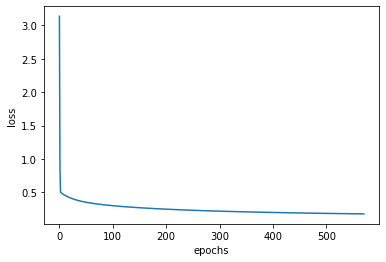

1.334950824631964
随机梯度下降算法耗时： 0.007977008819580078
迭代到第9次，结束迭代！


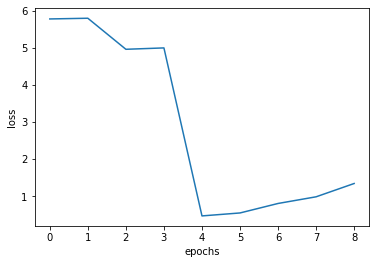

0.2237792860065808
小批量梯度下降算法耗时： 0.07081103324890137
迭代到第259次，结束迭代！


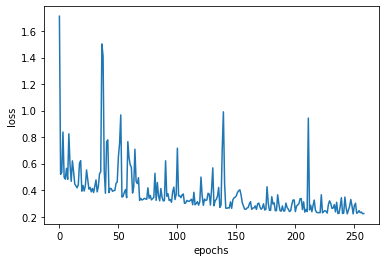

In [15]:
if __name__ == '__main__':
    data_x,data_y = loaddata('testSet.txt')
    weights_bgd = BGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-4)
    weights_sgd = SGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-4)
    weights_mbgd = MBGD_LR(data_x, data_y, alpha=0.1, batch_size=3, maxepochs=10000,epsilon=1e-4)

### 编程要求

复习以上内容，编写一个简单的梯度下降算法，通过给定的一系列的点，通过梯度下降算法拟合出一条直线。

### 参考答案

In [ ]:
from numpy import *

# 数据集大小 即20个数据点
m = 20
# x的坐标以及对应的矩阵
X0 = ones((m, 1))  # 生成一个m行1列的向量，也就是x0，全是1
X1 = arange(1, m+1).reshape(m, 1)  # 生成一个m行1列的向量，也就是x1，从1到m
X = hstack((X0, X1))  # 按照列堆叠形成数组，其实就是样本数据
# 对应的y坐标
Y = array([
    3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21
]).reshape(m, 1)
# 学习率
alpha = 0.01


# 定义代价函数
def cost_function(theta, X, Y):
    diff = dot(X, theta) - Y  # dot() 数组需要像矩阵那样相乘，就需要用到dot()
    return (1/(2*m)) * dot(diff.transpose(), diff)


# 定义代价函数对应的梯度函数
def gradient_function(theta, X, Y):
    diff = dot(X, theta) - Y
    return (1/m) * dot(X.transpose(), diff)


# 梯度下降迭代
def gradient_descent(X, Y, alpha):
    theta = array([1, 1]).reshape(2, 1)
    gradient = gradient_function(theta, X, Y)
    while not all(abs(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, Y)
    return theta


optimal = gradient_descent(X, Y, alpha)
print('optimal:', optimal)
print('cost function:', cost_function(optimal, X, Y)[0][0])


# 根据数据画出对应的图像
def plot(X, Y, theta):
    import matplotlib.pyplot as plt
    ax = plt.subplot(111)  # 这是我改的
    ax.scatter(X, Y, s=30, c="red", marker="s")
    plt.xlabel("X")
    plt.ylabel("Y")
    x = arange(0, 21, 0.2)  # x的范围
    y = theta[0] + theta[1]*x
    ax.plot(x, y)
    plt.show()


plot(X1, Y, optimal)
